# Potential Energy Curve for a Homonuclear Diatomic Molecule



## Setup python environment and imports

In [1]:
%%capture
!pip install pyscf


In [53]:
# pyscf imports:
from pyscf import gto, scf, mp, ci, cc

from pyscf.data.nist import HARTREE2EV

# For plotting
import matplotlib
from matplotlib import pyplot as plt

# For numerics:
import numpy as np

## Definition of the Molecule

Here you should define the homonuclear diatomic molecule to be considered.



In [3]:
Atom="N"

## Definition of the Functions to Generate the XYZ Coordiates and Calculations

In [4]:
def get_xyz(bondlength,atom="N"):
  xyz="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,bondlength/2,0.0,0.0)
  xyz+="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,-bondlength/2,0.0,0.0)
  return xyz

In [65]:
def run_calculation_hf(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    return mf.e_tot

def run_calculation_mp2(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    mf_mp2 = mp.MP2(mf).run()
    return mf_mp2.e_tot

def run_calculation_cisd(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    mf_cisd = ci.CISD(mf).run()
    return mf_cisd.e_tot

def run_calculation_ccsd(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    mf_ccsd = cc.CCSD(mf).run()
    et = mf_ccsd.ccsd_t()
    return mf_ccsd.e_tot, mf_ccsd.e_tot+et

## Hartree-Fock calculations with different basis sets

In [66]:
bondlengths = np.linspace(0.8,1.8,20)

basis_set="cc-pvdz"

energy_hf    = np.zeros(bondlengths.size)
energy_mp2   = np.zeros(bondlengths.size)
energy_cisd  = np.zeros(bondlengths.size)
energy_ccsd  = np.zeros(bondlengths.size)
energy_ccsdt = np.zeros(bondlengths.size)

for i, bl in enumerate(bondlengths):
  xyz=get_xyz(bondlength=bl,atom=Atom)
  energy_hf[i] = run_calculation_hf(xyz,basis=basis_set)
  energy_mp2[i] = run_calculation_mp2(xyz,basis=basis_set)
  energy_cisd[i] = run_calculation_cisd(xyz,basis=basis_set)
  energy_ccsd[i], energy_ccsdt[i] = run_calculation_ccsd(xyz,basis=basis_set)

energy_hf_eV = (energy_hf-np.min(energy_hf))*HARTREE2EV
energy_mp2_eV = (energy_mp2-np.min(energy_mp2))*HARTREE2EV
energy_cisd_eV = (energy_cisd-np.min(energy_cisd))*HARTREE2EV
energy_ccsd_eV = (energy_ccsd-np.min(energy_ccsd))*HARTREE2EV
energy_ccsdt_eV = (energy_ccsdt-np.min(energy_ccsdt))*HARTREE2EV



converged SCF energy = -108.40735863448
converged SCF energy = -108.40735863448
E(MP2) = -108.645735742509  E_corr = -0.238377108028913
E(SCS-MP2) = -108.639664895327  E_corr = -0.232306260846981
converged SCF energy = -108.40735863448
E(RCISD) = -108.648478823875  E_corr = -0.2411201893948629
converged SCF energy = -108.40735863448
E(CCSD) = -108.6598548325029  E_corr = -0.2524961980228027
CCSD(T) correction = -0.00547090629290842
converged SCF energy = -108.642435855906
converged SCF energy = -108.642435855906
E(MP2) = -108.891788674196  E_corr = -0.249352818289259
E(SCS-MP2) = -108.885214578606  E_corr = -0.24277872269957
converged SCF energy = -108.642435855906
E(RCISD) = -108.892300539723  E_corr = -0.2498646838166882
converged SCF energy = -108.642435855906
E(CCSD) = -108.905023568017  E_corr = -0.2625877121105945
CCSD(T) correction = -0.0062544718947831
converged SCF energy = -108.795044238407
converged SCF energy = -108.795044238407
E(MP2) = -109.055935965317  E_corr = -0.26089

### Analysis of Results

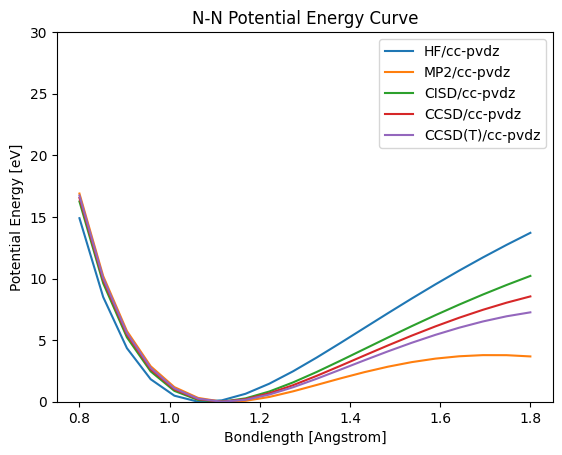

In [67]:
plt.figure(1)
plt.plot(bondlengths,energy_hf_eV,label="HF/{}".format(basis_set))
plt.plot(bondlengths,energy_mp2_eV,label="MP2/{}".format(basis_set))
plt.plot(bondlengths,energy_cisd_eV,label="CISD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsd_eV,label="CCSD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsdt_eV,label="CCSD(T)/{}".format(basis_set))
plt.legend()
plt.ylim([0,30])
plt.xlabel("Bondlength [Angstrom]")
plt.ylabel("Potential Energy [eV]")
plt.title("{0}-{0} Potential Energy Curve".format(Atom))

plt.show()